In [15]:
import ConfigParser
import pandas as pd
import datetime
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
conf = ConfigParser.RawConfigParser()
conf.read('cli.properties')
hostName = conf.get('AiravataServer', 'host')
port = conf.get('AiravataServer', 'port')

In [2]:
from airavata_cli import AiravataCLI
airavata_cli = AiravataCLI(hostName, int(port))
print(airavata_cli.printVersion())

AuthzToken(claimsMap={'userName': 'admin', 'gatewayID': 'seagrid'}, accessToken='empty-token')
0.17.0
0.17.0

Welcome to Airavata CLI v0.0.1 - Wirtten in python


None


## Making Sure we are connected to the right Gateway

In [3]:
airavata_cli.get_gatewaylist()

[Gateway(gatewayId='Arc', emailAddress='airavata.Arc', domain='Arc', gatewayName=None),
 Gateway(gatewayId='brandeis', emailAddress=None, domain='Brandeis University Science Gateway', gatewayName=None),
 Gateway(gatewayId='chemcompute', emailAddress=None, domain='Chem Compute Gateway', gatewayName=None),
 Gateway(gatewayId='cornelldna', emailAddress='dreg.cornell', domain='dREG DNA Sequencing', gatewayName=None),
 Gateway(gatewayId='default', emailAddress=None, domain='Testdrive Portal', gatewayName=None),
 Gateway(gatewayId='georgiastate', emailAddress=None, domain='Georgia State PHP Gateway', gatewayName=None),
 Gateway(gatewayId='iugateway', emailAddress=None, domain='IU Gateway', gatewayName=None),
 Gateway(gatewayId='lsu', emailAddress=None, domain='LSU Cybergateway', gatewayName=None),
 Gateway(gatewayId='New Physics Gateway 5', emailAddress=None, domain='New Physics Gateway 5', gatewayName=None),
 Gateway(gatewayId='newg', emailAddress=None, domain='newg', gatewayName=None),
 Ga

## List of Resources the Gateway uses

In [4]:
airavata_cli.computer_resources().items()

[('jetstream.chemcompute.org_d87012a7-afbd-4439-b199-c5141045ea4d',
  'jetstream.chemcompute.org'),
 ('series.usda.gov_46bd9f3e-ab96-463b-ab5e-4e7cc527694f', 'series.usda.gov'),
 ('smic.hpc.lsu.edu_6b72d6d8-533b-42f5-9a67-8a596f719fe7', 'smic.hpc.lsu.edu'),
 ('ember.chpc.utah.edu_6fd6fb6f-4656-40d3-afa4-3521407cf14b',
  'ember.chpc.utah.edu'),
 ('mason.uits.iu.edu_4910ad55-317b-49c9-8cc1-032da55f974a',
  'mason.uits.iu.edu'),
 ('JetStream_3fe9cc27-26f2-45a7-bccd-c6c07d70e881',
  'js-170-153.jetstream-cloud.org'),
 ('test_511bb8bd-b2ef-423e-958e-7a0531226dbe', 'test'),
 ('BlueWaterII_9db6f84b-a099-40db-8d51-0f81b716b4cd', 'BlueWaterII'),
 ('tandy.oii.org_93580801-f1ae-4faa-a052-46a8e21a8772',
  'tcs.tandysupercomputing.org'),
 ('gordon.sdsc.edu_bb11b481-fe7e-44d4-95ba-d3ffcd08bf08', 'gordon.sdsc.edu'),
 ('TestKarst_ef43b68c-9fe6-419c-873e-f3efc63aeef7', 'TestKarst'),
 ('hpclogin.gsu.edu_964e7e13-f278-4bf5-8482-c8f07b556d52', 'hpclogin.gsu.edu'),
 ('hpc.usd.edu_b4bd47b0-6093-4166-8c02-c8

In [5]:
compute_resources = pd.DataFrame(list(airavata_cli.computer_resources().items()), columns=["Id", "Name"])
compute_resources

,Id,Name
0,jetstream.chemcompute.org_d87012a7-afbd-4439-b...,jetstream.chemcompute.org
1,series.usda.gov_46bd9f3e-ab96-463b-ab5e-4e7cc5...,series.usda.gov
2,smic.hpc.lsu.edu_6b72d6d8-533b-42f5-9a67-8a596...,smic.hpc.lsu.edu
3,ember.chpc.utah.edu_6fd6fb6f-4656-40d3-afa4-35...,ember.chpc.utah.edu
4,mason.uits.iu.edu_4910ad55-317b-49c9-8cc1-032d...,mason.uits.iu.edu
5,JetStream_3fe9cc27-26f2-45a7-bccd-c6c07d70e881,js-170-153.jetstream-cloud.org
6,test_511bb8bd-b2ef-423e-958e-7a0531226dbe,test
7,BlueWaterII_9db6f84b-a099-40db-8d51-0f81b716b4cd,BlueWaterII
8,tandy.oii.org_93580801-f1ae-4faa-a052-46a8e21a...,tcs.tandysupercomputing.org
9,gordon.sdsc.edu_bb11b481-fe7e-44d4-95ba-d3ffcd...,gordon.sdsc.edu


## Some other custom functions which can be created

In [6]:
airavata_cli.list_of_applications('seagrid')

[ApplicationInterfaceDescription(applicationName='Echo', applicationInputs=[InputDataObjectType(userFriendlyDescription='', name='Input-to-Echo', dataStaged=False, value='', applicationArgument='', isRequired=True, standardInput=False, requiredToAddedToCommandLine=True, type=0, inputOrder=1, metaData='')], applicationInterfaceId='Echo_3f480d1f-ea86-4018-94bb-015423d66a1c', applicationDescription='Simple Echo Application Interface', applicationOutputs=[OutputDataObjectType(dataMovement=False, name='Echo-Standard-Error', value='', applicationArgument='', isRequired=True, searchQuery='', location='', requiredToAddedToCommandLine=False, outputStreaming=False, type=6), OutputDataObjectType(dataMovement=False, name='Echo-Standard-Out', value='', applicationArgument='', isRequired=True, searchQuery='', location='', requiredToAddedToCommandLine=False, outputStreaming=False, type=5)], applicationModules=['Amber-Sander_e8ce4375-aa60-4dd9-aff5-61bbe1f275c0', 'Echo_19dc358d-d241-43d8-918c-f5a21a3b

In [7]:
airavata_cli.module_descriptions('seagrid')     

[ApplicationModule(appModuleName='Echo', appModuleVersion='', appModuleId='Echo_19dc358d-d241-43d8-918c-f5a21a3b0845', appModuleDescription='A Simple Echo Application'),
 ApplicationModule(appModuleName='Amber_Sander', appModuleVersion='', appModuleId='Amber-Sander_e8ce4375-aa60-4dd9-aff5-61bbe1f275c0', appModuleDescription='Assisted Model Building with Energy Refinement MD Package'),
 ApplicationModule(appModuleName='Gaussian', appModuleVersion='', appModuleId='Gaussian_57eb2905-1cd8-400e-ad40-cadfba8f434f', appModuleDescription='Gaussian provides capabilities for electronic structure modeling.'),
 ApplicationModule(appModuleName='AutoDock', appModuleVersion='', appModuleId='AutoDock_24d6d7da-1160-45b0-9958-63bcc9044804', appModuleDescription='AutoDock suite of automated docking tools'),
 ApplicationModule(appModuleName='Gromacs', appModuleVersion='', appModuleId='Gromacs_17f97a2e-bdea-4075-9425-6bde4a8d1317', appModuleDescription='GROMACS Molecular Dynamics Package'),
 ApplicationMod

##Setting the time parameters

In [8]:
start= datetime(2015,7,16,15,10)
end= datetime(2016,7,17,11,59)
fromTime = calendar.timegm(start.timetuple())
toTime = calendar.timegm(end.timetuple())

## Getting the list of Experiments executed during the above mentioned period

In [9]:
ds=airavata_cli.experiment_statistics("seagrid", fromTime*1000, toTime*1000)
#ds

In [10]:
All_Experiments = []
for i in ds.allExperiments:
    All_Experiments.append([i.userName, i.name, i.statusUpdateTime, i.resourceHostId, i.projectId, i.creationTime, 
                                i.experimentId, i.executionId, i.gatewayId, i.experimentStatus])
labels = ["User Name", "Name", "Status Update", "Resource Host ID", "Project ID", "Creation Time", "Experiment ID", 
          "Execution ID", "Gateway ID", "Experiment Status"]
df = pd.DataFrame(data=All_Experiments, columns=labels)
df.head()

,User Name,Name,Status Update,Resource Host ID,Project ID,Creation Time,Experiment ID,Execution ID,Gateway ID,Experiment Status
0,spamidig,nitromethane,None,bigred2.uits.iu.edu_ac140dca-3c88-46d8-b9ed-87...,XSEDE2016_91b3b903-e1d8-4959-86f4-86c30bd360a3,1468699643000,nitromethane_aeef7c36-37bd-47f4-ab58-baaf299f4da5,Gaussian_4e76aecd-d504-4ce2-9ccf-da9550159e7c,seagrid,COMPLETED
1,spamidig,norbornane,None,comet.sdsc.edu_91b900df-0ee0-4909-89b3-98e8f64...,XSEDE2016_91b3b903-e1d8-4959-86f4-86c30bd360a3,1468693309000,norbornane_a9185079-644f-497b-8a32-fc57cd6f21fd,Gaussian_4e76aecd-d504-4ce2-9ccf-da9550159e7c,seagrid,COMPLETED
2,SEAGRID1,norbornane,None,comet.sdsc.edu_91b900df-0ee0-4909-89b3-98e8f64...,SeagridTestProject1_5d4b4780-e893-406e-a857-6f...,1468693286000,norbornane_522de3d6-eacf-483d-b59e-65f3935ab28b,Gaussian_4e76aecd-d504-4ce2-9ccf-da9550159e7c,seagrid,COMPLETED
3,XSEDE_DEMO_1,norbornane,None,comet.sdsc.edu_91b900df-0ee0-4909-89b3-98e8f64...,XSEDE16DEMOProject1_64d33174-3b6e-4657-a278-90...,1468693285000,norbornane_a735083f-2151-4f54-9d21-ad034188bd6c,Gaussian_4e76aecd-d504-4ce2-9ccf-da9550159e7c,seagrid,COMPLETED
4,jeffdkinnison,gaussian,None,comet.sdsc.edu_91b900df-0ee0-4909-89b3-98e8f64...,xsedetutorial_4459e403-4ea5-41da-bc89-a356cf03...,1468691664000,gaussian_bcee6269-64b0-4417-beaa-f7d0f59f015a,Gaussian_4e76aecd-d504-4ce2-9ccf-da9550159e7c,seagrid,COMPLETED


In [11]:
df.shape

(1519, 10)

## Calculating percentage use of resources

In [12]:
ls5_cn = sum([1 for x, row in df.iterrows() if row[3] == 'ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aad1f8310ecf' and row[9] == 'COMPLETED'])
stampede_cn = sum([1 for x, row in df.iterrows() if row[3] == 'stampede.tacc.xsede.org_bf7958ae-f9d4-468b-b146-a201fb89bf12' and row[9] == 'COMPLETED'])
comet_cn = sum([1 for x, row in df.iterrows() if row[3] == 'comet.sdsc.edu_f24b0bba-5230-498d-97e2-46a975ee035b' and row[9] == 'COMPLETED'])
gordon_cn= sum([1 for x, row in df.iterrows() if row[3] == 'gordon.sdsc.edu_f9363997-4614-477f-847e-79d262ee8ef7' and row[9] == 'COMPLETED'])
#jureca_cn = sum([1 for x, row in df.iterrows() if row[3] == 'Jureca_32098185-4396-4c11-afb7-26e991a03476' and row[9] == 'COMPLETED'])
alamo_cn = sum([1 for x, row in df.iterrows() if row[3] == 'alamo.uthscsa.edu_4793b5cc-b991-4e43-b82d-17163b64ef29' and row[9] == 'COMPLETED'])

In [13]:
slices= [ls5_cn,stampede_cn,comet_cn,gordon_cn,alamo_cn]
cols = ['c','m','r','w','y']
Hosts= ["lonestar","stampede","comet","gordon" , "alamo"]
plt.pie(slices,
        labels= Hosts,
        colors=cols,
        startangle=90,
        shadow= False,
        autopct='%1.1f%%')

plt.title('Percentage Use by Resources')
plt.show()

NameError: name 'plt' is not defined

##Percentage failed by resources

In [14]:
ls5_fn = sum([1 for x, row in df.iterrows() if row[3] == 'ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aad1f8310ecf' and row[9] == 'FAILED'])
stampede_fn = sum([1 for x, row in df.iterrows() if row[3] == 'stampede.tacc.xsede.org_bf7958ae-f9d4-468b-b146-a201fb89bf12' and row[9] == 'FAILED'])
comet_fn = sum([1 for x, row in df.iterrows() if row[3] == 'comet.sdsc.edu_f24b0bba-5230-498d-97e2-46a975ee035b' and row[9] == 'FAILED'])
gordon_fn= sum([1 for x, row in df.iterrows() if row[3] == 'gordon.sdsc.edu_f9363997-4614-477f-847e-79d262ee8ef7' and row[9] == 'FAILED'])
#jureca_fn = sum([1 for x, row in df.iterrows() if row[3] == 'Jureca_32098185-4396-4c11-afb7-26e991a03476' and row[9] == 'FAILED'])
alamo_fn = sum([1 for x, row in df.iterrows() if row[3] == 'alamo.uthscsa.edu_4793b5cc-b991-4e43-b82d-17163b64ef29' and row[9] == 'FAILED'])

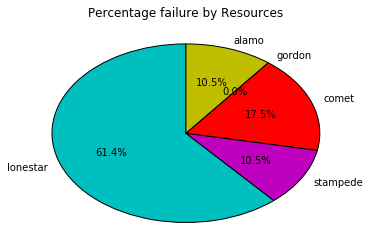

In [15]:
slices= [ls5_fn,stampede_fn,comet_fn,gordon_fn,alamo_fn]
cols = ['c','m','r','w','y']
Hosts= ["lonestar","stampede","comet","gordon" , "alamo"]
plt.pie(slices,
        labels= Hosts,
        colors=cols,
        startangle=90,
        shadow= False,
        autopct='%1.1f%%')

plt.title('Percentage failure by Resources')
plt.show()

## Percentage cancelled by resources

In [16]:
ls5_xn = sum([1 for x, row in df.iterrows() if row[3] == 'ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aad1f8310ecf' and row[9] == 'CANCELED'])
stampede_xn = sum([1 for x, row in df.iterrows() if row[3] == 'stampede.tacc.xsede.org_bf7958ae-f9d4-468b-b146-a201fb89bf12' and row[9] == 'CANCELED'])
comet_xn = sum([1 for x, row in df.iterrows() if row[3] == 'comet.sdsc.edu_f24b0bba-5230-498d-97e2-46a975ee035b' and row[9] == 'CANCELED'])
gordon_xn= sum([1 for x, row in df.iterrows() if row[3] == 'gordon.sdsc.edu_f9363997-4614-477f-847e-79d262ee8ef7' and row[9] == 'CANCELED'])
#jureca_xn = sum([1 for x, row in df.iterrows() if row[3] == 'Jureca_32098185-4396-4c11-afb7-26e991a03476' and row[9] == 'CANCELED'])
alamo_xn = sum([1 for x, row in df.iterrows() if row[3] == 'alamo.uthscsa.edu_4793b5cc-b991-4e43-b82d-17163b64ef29' and row[9] == 'CANCELED'])

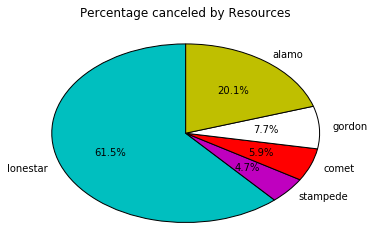

In [17]:
slices= [ls5_xn,stampede_xn,comet_xn,gordon_xn,alamo_xn]
cols = ['c','m','r','w','y']
Hosts= ["lonestar","stampede","comet","gordon" , "alamo"]
plt.pie(slices,
        labels= Hosts,
        colors=cols,
        startangle=90,
        shadow= False,
        autopct='%1.1f%%')

plt.title('Percentage canceled by Resources')
plt.show()

## Number of Experiments Canceled by a user

In [18]:
number = sum([1 for x, row in df.iterrows() if row[0] == 'smarru' and row[9] == 'CANCELED'])
number

0

## Sorting users by the number of experiments cancelled/failed

In [19]:
df[df['Experiment Status'] == 'CANCELED']['User Name'].value_counts().sort_values(ascending=False)

Daniel_Krzizike_550162c5-88f4-5624-cd19-1147783ec5ed        44
Victoria_Saenz_3963bfc5-9a55-d8f4-35f2-a98819ba7825         36
Uma_Muthurajan_912a2d20-e858-a4b4-fdbf-6cdf8ec8e182         18
Shaoxiong_Tian_f3c15677-e1d3-c894-7539-005f6df5e1b6         18
Borries_Demeler_02d0c21b-1adf-9414-c175-d005bb256320         9
Akash_Bhattacharya_65724131-4b32-bec4-5974-aa29b945deaf      9
Ge_Yu_8d9a3ed0-135a-c974-69f5-44beb56d182f                   6
Aysha Kinjo_Demeler_6804fe7e-35ce-f604-3905-bb73330ef346     4
Todd_Stone_8aee0ad6-f820-8584-f18a-9a0fa325fd34              4
Chris_Pierini_1c0bf9ca-2756-f454-355c-fbce45017f8b           4
Gary_Gorbet_84f540d7-3276-8894-a544-fae60062b41c             3
Borries_Demeler_0b30314f-70d9-74d4-7564-d9684b1a9a13         3
William_Dean_e199fd03-1b9a-a214-ad3f-1d25202091c9            3
Chris_Pierini_36b27c6b-f5ad-3794-6d81-0038d249d19b           2
Aysha_Demeler_09d108a4-4a6c-f884-e971-5ea68f402fde           1
Claudius_Mundoma_e1c6c320-ca98-f704-255c-b44fd6642c4d  

##  Experiments Created by the hour of the day

In [20]:
df['hour_of_day'] = df['Creation Time'].apply(lambda time: datetime.utcfromtimestamp(time/1000).hour)

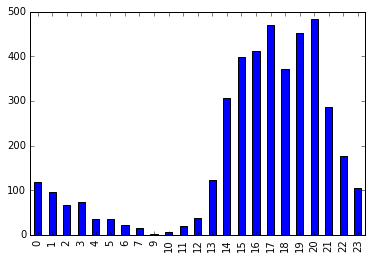

In [21]:
df['hour_of_day'].value_counts().sort_index().plot('bar')

## Experiments failed by the hour of the day

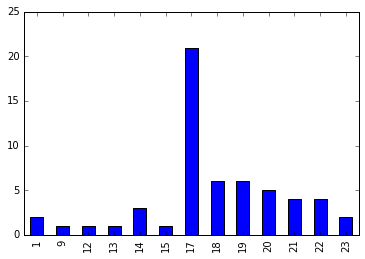

In [22]:
df[df['Experiment Status'] == 'FAILED']['hour_of_day'].value_counts().sort_index().plot('bar')

## Experiments canceled by the hour of the day